# Data explorations
In this notebook, a first analysis of the data from [Wang (2017)](https://arxiv.org/abs/1705.00648) will be performed. 

In [31]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### Data loading class for interaction with the data

In [6]:
# Adds a reference to the file which holds data interactivity functions
exec(open('data_loader.py').read())

In [9]:
# DataLoader is a class from the file above
data = DataLoader()
data.df['train']

,label,statement,subjects,speaker,speaker_job,state,party,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context
id,,,,,,,,,,,,,
2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website


## Testing descriptive statistics
To ensure the dataset has not been adjusted, we need to combine the three datasets and compare some counts with the listings in the research article. The following dataset statistics should be present:

| Dataset statistics             |        || Top-3 Speaker Affiliations |       |
|--------------------------------|--------||----------------------------|-------|
| Training set size              | 10,269 || Democrats                  | 4,150 |
| Validation set size            | 1,284  || Republicans                | 5,687 |
| Testing set size               | 1,283  || None (e.g., FB posts)      | 2,185 |
| Avg. statement length (tokens) | 17.9   |







In [10]:
print({
    'Training set size': len(data.df['train'].label),
    'Validation set size': len(data.df['validation'].label),
    'Testing set size': len(data.df['test'].label),
    'Avg. statement length (tokens)': pd.concat([data.df['train'].statement, data.df['test'].statement, data.df['validation'].statement]).apply(lambda x: len(x.split(' '))).mean(),
})

affil_col = pd.concat([data.df['train'].party, data.df['test'].party, data.df['validation'].party])
print({
    'Democrats': len(list(filter(lambda x: x == 'democrat', affil_col.values))),
    'Republicans': len(list(filter(lambda x: x == 'republican', affil_col.values))),
    'None': len(list(filter(lambda x: x == 'none', affil_col.values))),
})

{'Training set size': 10240, 'Validation set size': 1284, 'Testing set size': 1267, 'Avg. statement length (tokens)': 17.991947463059965}
{'Democrats': 4137, 'Republicans': 5665, 'None': 2181}


Although there are minor differences, we can conclude that the dataset from the research article has not been adjusted heavily since release.

## Analysis of subjects
To get a better idea of the context of the statements, it might be interesting to look at some statistics surrounding the subjects.

In [22]:
subjects = []

for subject in pd.concat([data.df['train'].subjects, data.df['test'].subjects, data.df['validation'].subjects]).values:
    try:
        subjects.append(subject.split(','))
    except:
        pass

subjects = np.concatenate(subjects)

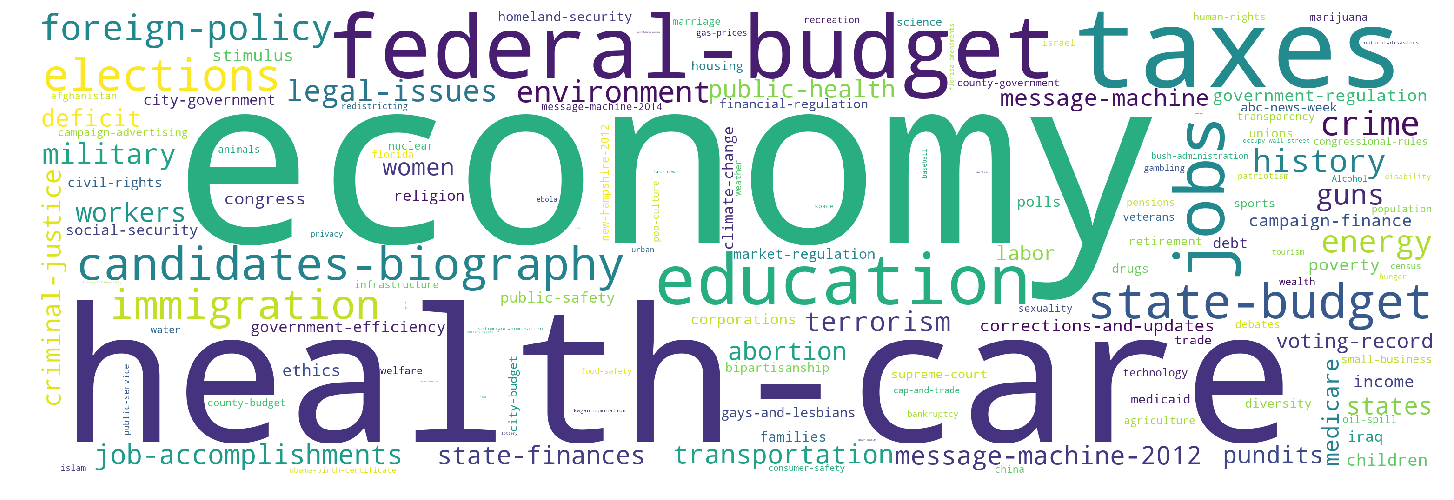

In [45]:
subjects_counter = Counter(subjects)
wordcloud = WordCloud(width = 3000, height = 1000, background_color = 'white').generate_from_frequencies(subjects_counter)

plt.figure(figsize = (25, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [46]:
subjects_counter.most_common(5)

[('economy', 1432),
 ('health-care', 1426),
 ('taxes', 1218),
 ('federal-budget', 937),
 ('education', 926)]